# B_A3_Feature_Extraction

In [1]:
# Importing necessary libraries
from skimage.io import imread  # For reading images
from skimage.color import rgb2gray  # For converting color images to grayscale
from skimage.filters import threshold_otsu, gaussian  # For Otsu's thresholding and Gaussian blur
import matplotlib.pyplot as plt  # For displaying images and plotting
import numpy as np  # For numerical operations
import cv2  # For image processing using OpenCV
import os  # For handling file paths


In [2]:
# Function to display a single image
def show_img(image, title="Image"):
    """
    Displays a single image with a title.
    
    Parameters:
    - image: The image to display.
    - title: The title of the image.
    """
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

# Function to display multiple images side by side
def show_images(images, titles):
    """
    Displays multiple images side by side with their respective titles.
    
    Parameters:
    - images: A list of images to display.
    - titles: A list of titles corresponding to each image.
    """
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5 * n, 5))  # Adjust figsize based on number of images
    for i in range(n):
        ax = axes[i]
        cmap = 'gray' if len(images[i].shape) == 2 else None
        ax.imshow(images[i], cmap=cmap)
        ax.set_title(titles[i])
        ax.axis('off')  # Hide axes
    plt.tight_layout()
    plt.show()


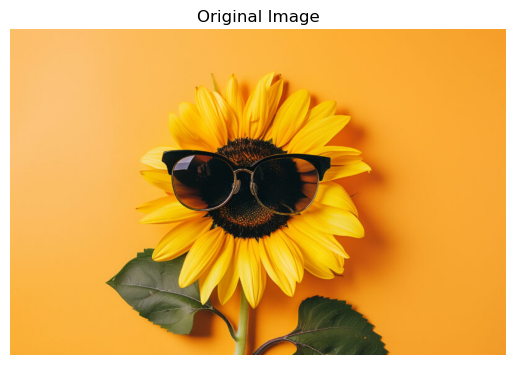

In [3]:
# Load and display the original image
image_path = r"C:\\Users\\asus\\Downloads\\suhail\\ISR LAb\\123.jpg"

# Check if the image file exists
if not os.path.exists(image_path):
    raise FileNotFoundError(f"Image file not found at {image_path}")

# Read the image using skimage
image = imread(image_path)

# Display the original image
show_img(image, "Original Image")


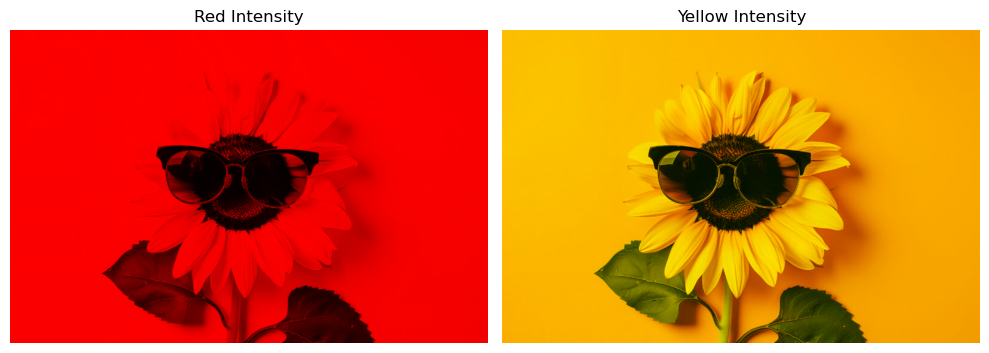

In [4]:
# Create red and yellow intensity images
red, yellow = image.copy(), image.copy()

# Remove green and blue channels for the red image
red[:, :, (1, 2)] = 0  # Set green and blue channels to zero

# Remove blue channel for the yellow image (leaving only red and green)
yellow[:, :, 2] = 0  # Set the blue channel to zero

# Display the red and yellow intensity images
show_images(images=[red, yellow], titles=['Red Intensity', 'Yellow Intensity'])


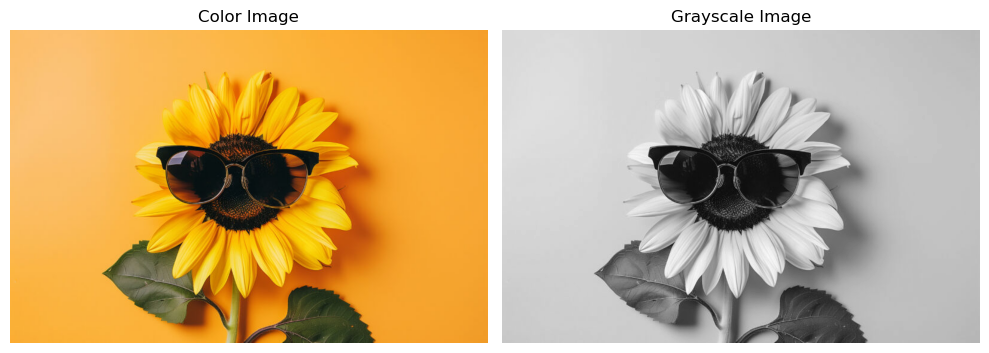

In [5]:
# Convert the original image to grayscale
gray_image = rgb2gray(image)

# Display the original and grayscale images side by side
show_images(images=[image, gray_image], titles=["Color Image", "Grayscale Image"])


In [6]:
# Print the dimensions of the images
print("Colored image shape:", image.shape)
print("Grayscale image shape:", gray_image.shape)


Colored image shape: (525, 800, 3)
Grayscale image shape: (525, 800)


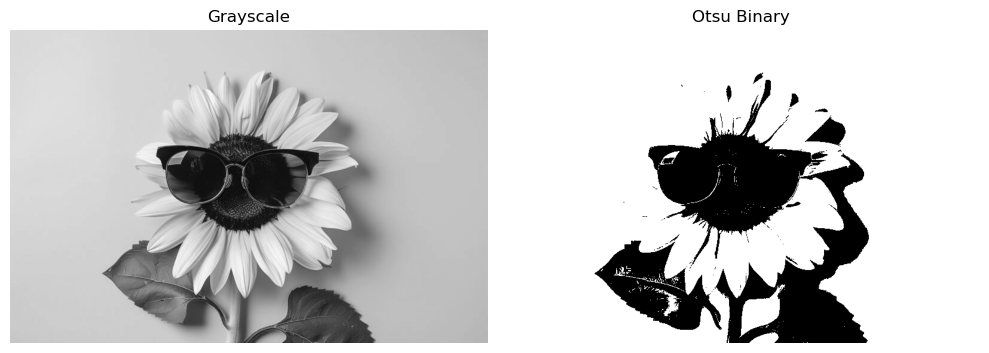

In [7]:
# Apply Otsu's thresholding to the grayscale image
thresh = threshold_otsu(gray_image)

# Create a binary image based on the threshold
binary_image = gray_image > thresh

# Display grayscale and binary (thresholded) images
show_images(images=[gray_image, binary_image], titles=["Grayscale", "Otsu Binary"])


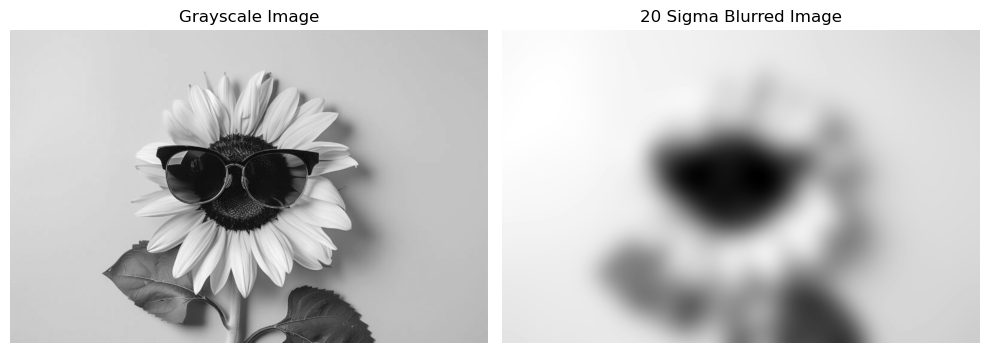

In [8]:
# Apply Gaussian blur to the grayscale image
blurred_image = gaussian(gray_image, sigma=20)

# Display the grayscale image and the blurred image
show_images(images=[gray_image, blurred_image], titles=["Grayscale Image", "20 Sigma Blurred Image"])


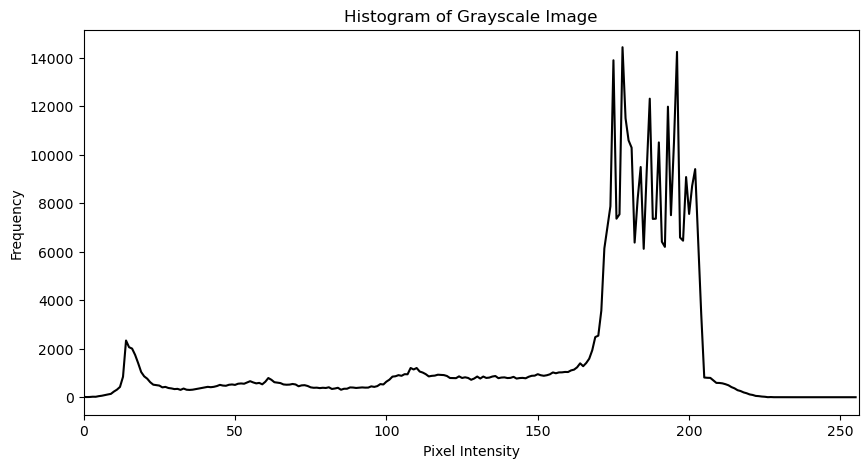

In [9]:
# Example: Reading and plotting histogram of an image using OpenCV and Matplotlib

# Load an image using OpenCV in grayscale mode
img_cv = cv2.imread(r"C:\\Users\\asus\\Downloads\\suhail\\ISR LAb\\123.jpg", 0)

# Check if the image was loaded successfully
if img_cv is None:
    raise FileNotFoundError("Image file not found or unable to load.")

# Calculate the histogram for grayscale image (0-255 intensity levels)
histg = cv2.calcHist([img_cv], [0], None, [256], [0, 256])

# Plotting the histogram to analyze pixel intensity distribution
plt.figure(figsize=(10, 5))
plt.plot(histg, color='black')
plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits to [0, 256]
plt.show()
